# Описание эксперимента

 В качестве решения я решил провести серию простых численных экспериментов, отталкиваясь от наивного подхода, заключающегося в том, чтобы в среднем задачи не копились. То есть, общее время решения задач совпадало с количеством имеющегося в течение дня рабочего времени.5 задач в день при идеальных обстоятельствах занимают 15 часов рабочего времени, что укладывается в 16 часов работы двух специалистов. Основной вопрос, который возникает: насколько сильно разнится количество задач, приходящих в течение дня, а также, насколько ситуацию портит неравномерность прихода задач (например, задачи приходят скопом в конце одного рабочего дня, а затем в начале следующего). Это может приводить к возникновению заторов из задач, и, в свою очеред, к последовательности просроченных задач. 
 В качестве параметров симуляции я выбрал продолжительность эксперимента в днях, среднее количество задач в день (считая распределение такого количества Гауссовым) и его стандартное отклонение (к сожалению не задано авторами-составителями), и количетсво сотрудников

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import datetime
import random
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'
from pylab import rcParams

In [2]:
legend = {}
legend['val'] = 'среднее число заказов в день'
legend['disp'] = 'стандартное отклонение числа заказов в день'
legend['period'] = 'длительность эксперимента в днях'
legend['staff'] = 'количество сотрудников'

In [3]:
# создаём функцию генерации случайного количества заказов на каждый день в течение заданного периода
def order_gen (val, disp, period):
    random.seed()
    x = [(int(round(random.gauss(val, disp),0))) for i in range(0,period)]  # используем Гауссово распределение для количества задач, поступивших в течение дня
    return x   # возвращает сгенерированный список количества поступивших задач по дням

In [4]:
# генератор времени заказа
# задаёт последовательность времени заказов в рабочих часах
# стартовая точка - начало эксперимента
def time_gen (order_conseq):
    random.seed()
    x = []
    for i in range(0,len(order_conseq)): 
        x = x + [((round(random.uniform(0,8),1)) + 8 * i) for j in range(0, order_conseq[i])] # распределение времени прихода задач в течение дня - равномерное
    return sorted(x)  # возвращает список времени поступления задачи в рабочих часах с начала эксперимента

In [5]:
def experiment (val, disp, period, staff):
    order_conseq = order_gen(val=val, disp=disp, period=period) # генерируем количество задач
    times = time_gen (order_conseq) # генерируем время прихода задач

    # решаем задачу, считая, что задача решается три часа, задача успешно решена, если с момента её 
    # поступления до её решения проходит менее 16 часов
    # задачи решаются в порядке поступления

    # создадим список, поместим в него время, в которое осободится от решения текущей задачи каждый из сотрудников
    # за новую задачу берётся тот из сотрудников, кто освободился раньше
    busy = [0 for i in range(0, staff)]

    # создадим список со временем решения текущей задачи
    decision_time = [0 for i in range(0, len(times))]
    
    for i in range(0, len(times)):
        if times[i] >= min(busy):
            decision_time[i] = times[i] + 3    # если один из дизайнеров свободен - задача решена через три часа
        else:
            decision_time[i] = min(busy) + 3   # если свободных нет - за задачу возьмётся первый освободившийся
        busy[busy.index((min(busy)))] = decision_time[i]   # дизайнер до этого времени занят
    
    
    # задача провалена, если между временем поступления и временем её решения прошло более 16 часов (2 рабочих дня)
    res_time = [(decision_time[i] - times[i]) for i in range(0,len(times))]  # список с временем решения задач
    res = [1 if i <= 16 else 0 for i in res_time]   # список: 1 - задача решена вовремя, 0 - провалена
    
    print('количество дней эксперимента: ', period)
    print('количество сотрудников: ', staff)
    print('среднее количество задач в день (стандартное отклонение): '+str(round(statistics.mean(order_conseq),1))+' ('+
         str(round(statistics.stdev(order_conseq),1))+')')
    print('среднее время решения задачи (стандартное отклонение), в часах: '+str(round(statistics.mean(res_time),1))+' ('+
         str(round(statistics.stdev(res_time),1))+')')
    print('процент задач решённых в течение 16 часов с момента поступления: '+str(round(sum(res)/len(res)*100,1)))
    
    rcParams['figure.figsize'] = 10, 8
    plt.plot(res_time)
    plt.xticks(rotation=90) 
    plt.xlabel('номер задачи')
    plt.ylabel('время решения задачи, ч')
    plt.title('график времени решения задачи во времени')
    plt.axhline(y=16, color='r', linestyle='-', label='дэдлайн решения (16 часов)')
    plt.legend()

# Эксперимент 1

количество дней эксперимента:  90
количество сотрудников:  2
среднее количество задач в день (стандартное отклонение): 5.2 (1.9)
среднее время решения задачи (стандартное отклонение), в часах: 11.4 (5.6)
процент задач решённых в течение 16 часов с момента поступления: 78.8


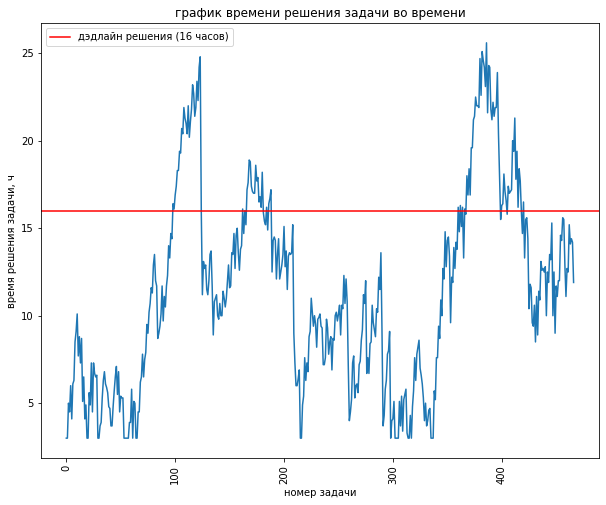

In [11]:
val = 5       #среднее число заказов в день
disp = 2      #стандартное отклонение
period = 90   #длительность эксперимента в днях
staff = 2     #количество сотрудников 
experiment(val, disp, period, staff)

## Выводы
На самом деле, серия симуляций показывает, что почти всегда возникают завалы в работе, связанный с одновременным приходом большого количества задач. Иногда они быстро рассасываются, а иногда тянут за собой длинную очередь задач, не имеющих шансы быть решёнными вовремя, как показано на типичном графике выше. Хотя, возможно, 2 сотрудника могут справиться, если будут периодически работать сверхурочно, такой штат будет неустойчив при напрыве задач, или выбывании одного из сотрудников

# Эксперимент 2

количество дней эксперимента:  90
количество сотрудников:  2
среднее количество задач в день (стандартное отклонение): 5.0 (1.0)
среднее время решения задачи (стандартное отклонение), в часах: 5.9 (2.7)
процент задач решённых в течение 16 часов с момента поступления: 100.0


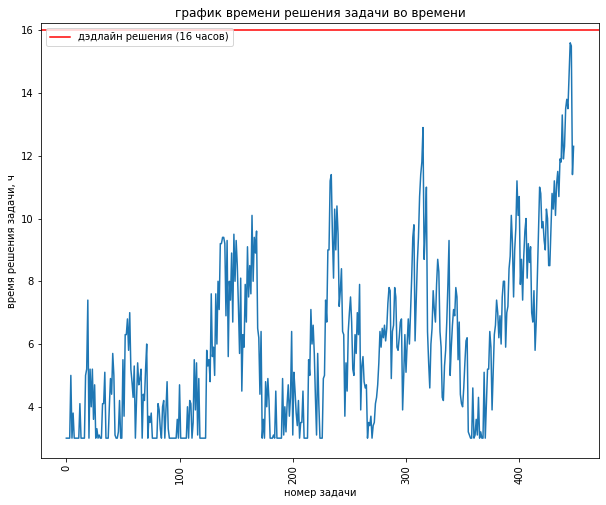

In [7]:
val = 5       #среднее число заказов в день
disp = 1      #стандартное отклонение
period = 90   #длительность эксперимента в днях
staff = 2     #количество сотрудников 
experiment(val, disp, period, staff)

## Выводы
Как оказалось уменьшение дисперсии в количестве задач, приходящих за день, сильно поменяло результаты, по сравнению с предыдущим экспериментом, и два сотрудника вполне справляются

# Эксперимент 3

количество дней эксперимента:  90
количество сотрудников:  3
среднее количество задач в день (стандартное отклонение): 4.5 (3.3)
среднее время решения задачи (стандартное отклонение), в часах: 3.7 (1.1)
процент задач решённых в течение 16 часов с момента поступления: 100.0


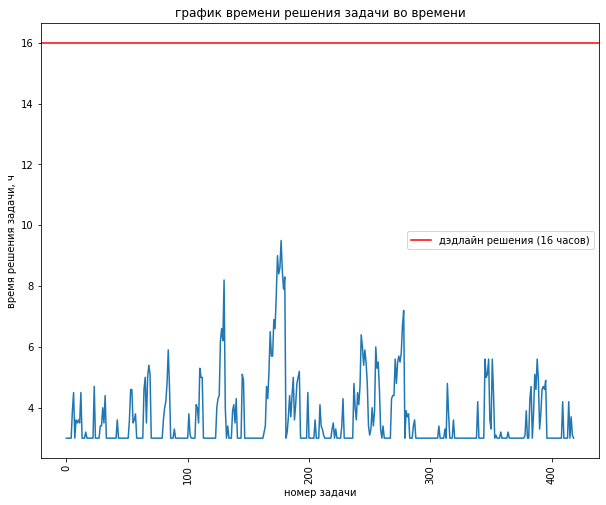

In [8]:
val = 5       #среднее число заказов в день
disp = 4      #стандартное отклонение
period = 90   #длительность эксперимента в днях
staff = 3     #количество сотрудников 
experiment(val, disp, period, staff)

## Выводы
Три сотрудника справляются даже с большим наплывом задач при довольно большом разброме в их количестве (дисперсия больше 3)

# Общий вывод
На мой взгляд, основная проблема, возникающая при решении данной задачи, отсутствие данных о реальном разбросе в количестве приходящих в течение дня задач.
В зависимости от этого меняется количество сотрудников, необходимых для стабильного выполнения заказов. 
При небольшом разбросе около 5 задач в день верным оказывается результат наивного подхода: двух сотрудников вполне хватает.
Однако если количество задач варьируется сильнее, то двух сотрудников может не хватить. Трое же справляются даже с 
периодическими наплывами заказов.


In [10]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')